In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
df=pd.read_csv("E:\Data\Wholesale customers data.csv")

In [3]:
df.shape

(440, 8)

In [4]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [5]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [6]:
df=df.drop_duplicates()

In [7]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [8]:
df.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

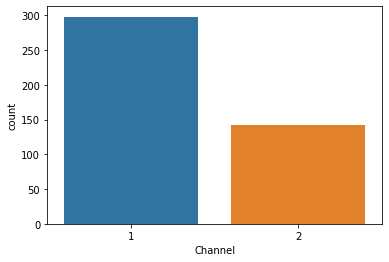

In [9]:
sns.countplot(x="Channel",data=df)
plt.show()

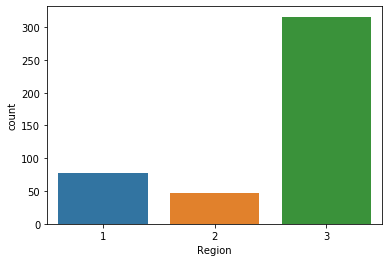

In [10]:
sns.countplot(x="Region",data=df)
plt.show()

In [11]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

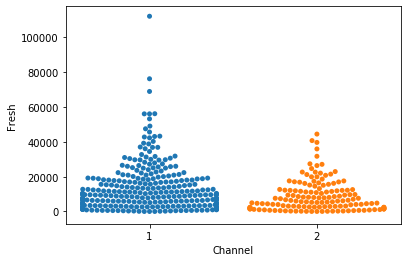

In [12]:
sns.swarmplot(x="Channel",y="Fresh",data=df)
plt.show()

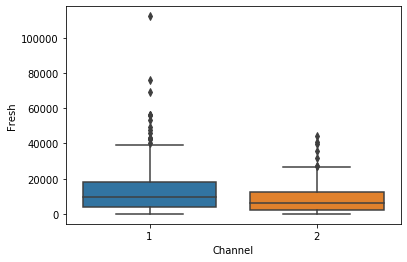

In [13]:
sns.boxplot(x="Channel",y="Fresh",data=df)
plt.show()

In [15]:
df["Fresh"].quantile(0.25)

3127.75

In [16]:
df["Fresh"].quantile(0.50)

8504.0

In [17]:
df["Fresh"].quantile(0.75)

16933.75

In [18]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [19]:
x=df[["Fresh","Milk"]]

In [20]:
from sklearn.cluster import KMeans

In [78]:
model=KMeans(n_clusters=6)
model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [79]:
x["cluster"]=model.predict(x)

C:\Users\aspdiscovery\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [76]:
sum_distance=[]
k=range(1,20)
for i in k:
    km=KMeans(n_clusters=i)
    km=km.fit(x)
    sum_distance.append(km.inertia_)
    

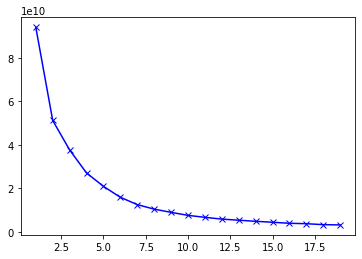

In [77]:
plt.plot(k,sum_distance,'bx-')
plt.show()

In [80]:
model.cluster_centers_
cen=model.cluster_centers_
cen

array([[4.33499034e+03, 3.59843961e+03, 1.00000000e+00],
       [3.26629783e+04, 5.13978261e+03, 8.26086957e-01],
       [5.07335294e+03, 1.56697059e+04, 9.80392157e-01],
       [1.59350569e+04, 3.46428455e+03, 2.76422764e-01],
       [3.04450000e+04, 4.87826667e+04, 1.83333333e+00],
       [6.84097143e+04, 7.29885714e+03, 2.00000000e+00]])

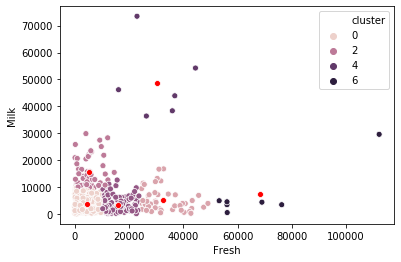

In [81]:
sns.scatterplot(x="Fresh",y="Milk",hue="cluster",data=x)
sns.scatterplot(cen[:,0],cen[:,1],color='red')
plt.show()

In [65]:
df.columns
df2=df[['Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']]

In [66]:
sum_distance=[]
k=range(1,20)
for i in k:
    km=KMeans(n_clusters=i)
    km=km.fit(df2)
    sum_distance.append(km.inertia_)

In [67]:
sum_distance

[157595857165.6091,
 113217528520.90994,
 80332413843.01636,
 64855545528.211044,
 53116919400.73703,
 46759761055.11203,
 41679842360.937805,
 36182687855.192535,
 33352664229.156845,
 30156037167.782837,
 27942363914.048676,
 26558060407.804165,
 24225976417.771393,
 23189038252.252117,
 21329963085.56909,
 20125414055.32022,
 18891445722.966873,
 18036510111.798042,
 16599296884.281666]

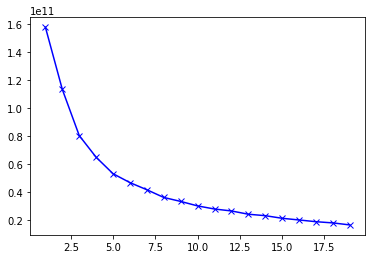

In [70]:
plt.plot(k,sum_distance,'bx-')
plt.show()

In [73]:
algo=KMeans(n_clusters=6)
algo.fit(df2)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [74]:
df2["cluster"]=algo.predict(df2)

C:\Users\aspdiscovery\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [75]:
df2

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,1
4,22615,5410,7198,3915,1777,5185,1
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,1
436,39228,1431,764,4510,93,2346,3
437,14531,15488,30243,437,14841,1867,2
438,10290,1981,2232,1038,168,2125,0
